# 00 settings

In [6]:
import pandas as pd
import h5py
import hdf5storage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
import pymannkendall as mk

# settings
duration = 10

bs_start_idx = [2306,2338,2369,2418,2452,2485,2546,2596,2687,2696,2765,2915,3014,3071,3130,3283,3402,3581,3662]
bs_end_idx = [2330,2357,2384,2436,2474,2500,2596,2650,2696,2729,2792,2936,3021,3081,3140,3291,3410,3590,3670]
ane_start_idx = [2288,2330,2357,2384,2436,2474,2500,2650,2729,2792,2936,3021,3081,3140,3242,3291,3410,3590,3670]
ane_end_idx = [2306,2339,2369,2418,2452,2485,2546,2687,2765,2915,3014,3071,3130,3236,3283,3402,3581,3662,3788]

# path
res_path = 'F:/THU/anesthesia_light/data_analysis_res_m010/'
load_path = 'F:/THU/anesthesia_light/data_m010/'

print("res_path:", res_path)
print("load_path:", load_path)

res_path: F:/THU/anesthesia_light/data_analysis_res_m010/
load_path: F:/THU/anesthesia_light/data_m010/


# 01 load data

denoised_data: (17655, 9676)


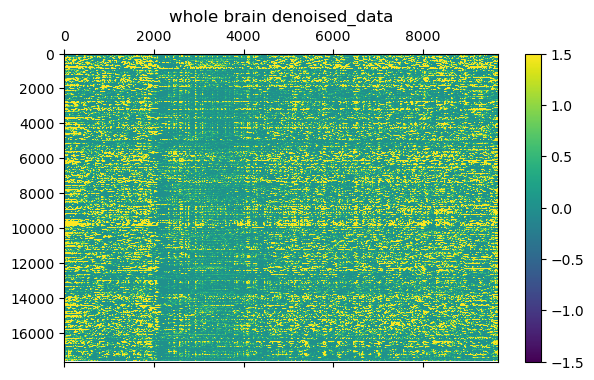

In [2]:
'''
load data
'''
denoised_data = np.load(res_path + "records/neuron_denoised_records_whole_brain.npy")
print("denoised_data:", denoised_data.shape)

fig,ax = plt.subplots(figsize=(7,4), dpi=100,facecolor="w")
caxes = ax.matshow(denoised_data, vmin = -1.5, vmax = 1.5, cmap = "viridis", aspect = "auto")
fig.colorbar(caxes)
plt.title("whole brain denoised_data")
plt.show()

valid_neuron_x: <class 'pandas.core.frame.DataFrame'> (17655, 1)
valid_neuron_y: <class 'pandas.core.frame.DataFrame'> (17655, 1)
atlas_top_projection: F:/THU/anesthesia_light/data_m010/allen_brain_map/atlas_top_projection.mat
dict_keys(['__header__', '__version__', '__globals__', 'acronyms', 'atlas_outline', 'clean_atlas_outline', 'clean_cortex_outline', 'cortex_outline', 'ids', 'names', 'parents', 'top_projection'])
cortical_out_line_resize_5: F:/THU/anesthesia_light/data_m010/allen_brain_map/cortical_out_line_resize_5.mat
dict_keys(['__header__', '__version__', '__globals__', 'to_show'])
(2280, 2640)


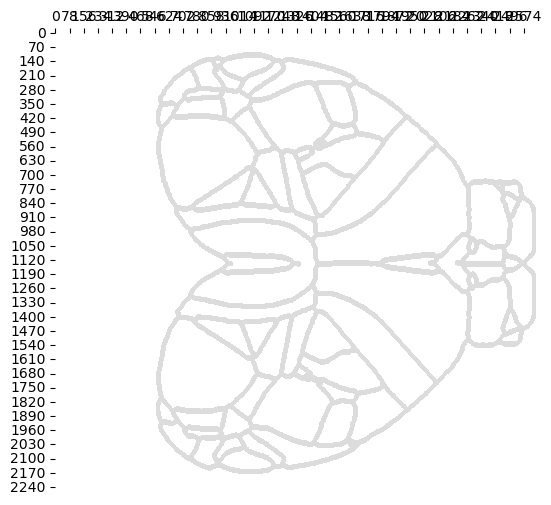

(1327,) (1327,) (1327,) (456, 528) 1327


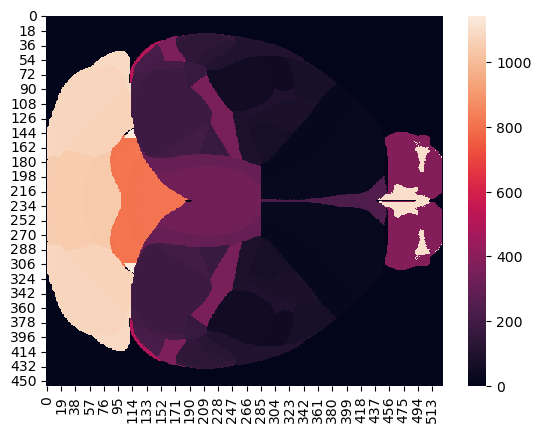

In [7]:
valid_neuron_x = pd.read_csv(load_path + "ele_calc/valid_neuron_x.csv")
print("valid_neuron_x:", type(valid_neuron_x), valid_neuron_x.shape)
valid_neuron_x = valid_neuron_x.values

valid_neuron_y = pd.read_csv(load_path + "ele_calc/valid_neuron_y.csv")
print("valid_neuron_y:", type(valid_neuron_y), valid_neuron_y.shape)
valid_neuron_y = valid_neuron_y.values

atlas_top_projection = load_path + 'allen_brain_map/atlas_top_projection.mat'
print("atlas_top_projection:", atlas_top_projection)
atlas_top_projection_data = hdf5storage.loadmat(atlas_top_projection)
print(atlas_top_projection_data.keys())

cortical_out_line_resize_5 = load_path + 'allen_brain_map/cortical_out_line_resize_5.mat'
print("cortical_out_line_resize_5:", cortical_out_line_resize_5)
cortical_out_line_resize_5_data = hdf5storage.loadmat(cortical_out_line_resize_5)
print(cortical_out_line_resize_5_data.keys())
print(cortical_out_line_resize_5_data["to_show"].shape)

data = pd.DataFrame(cortical_out_line_resize_5_data["to_show"])
fig,ax = plt.subplots(figsize=(6.2,6),dpi=100,facecolor="w")
sns.heatmap(data, vmin = -1, vmax = 1, cmap = "coolwarm", cbar = False)
ax.xaxis.tick_top()
plt.show()

ids = np.load(load_path + "allen_brain_map/ids_new_order.npy")
names = np.load(load_path + "allen_brain_map/names_new_order.npy")
acronyms = np.load(load_path + "allen_brain_map/acronyms_new_order.npy")
top_projection_new = np.load(load_path + "allen_brain_map/top_projection_labeled_new_id.npy")
ids_names = np.load(load_path + "allen_brain_map/ids_to_names_acronyms.npy", allow_pickle = True).item()
print(ids.shape, names.shape, acronyms.shape, top_projection_new.shape, len(ids_names))

data = pd.DataFrame(top_projection_new)
sns.heatmap(data)
plt.show()


# 02 plot neuron map

2288 select_data_ids: 1038


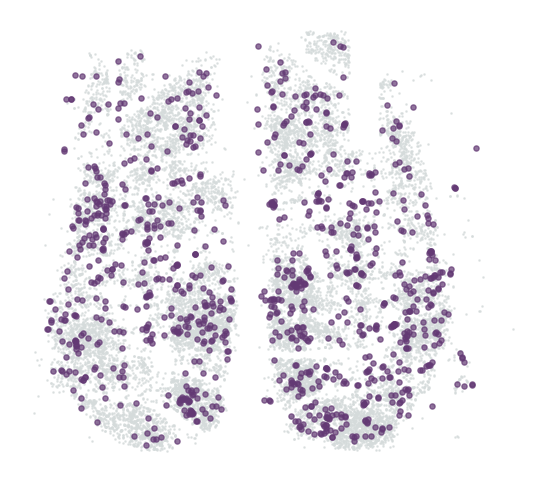

2330 select_data_ids: 2334


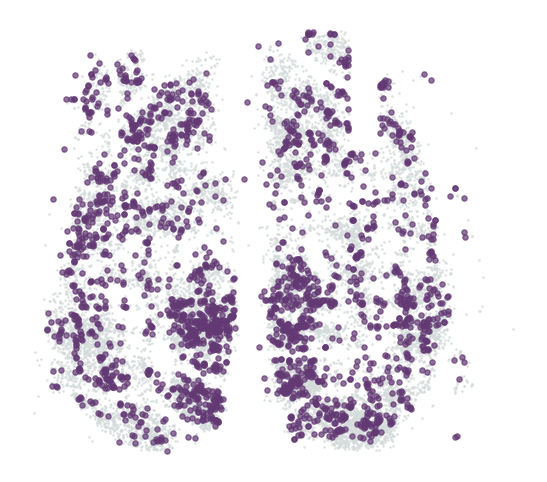

2357 select_data_ids: 1464


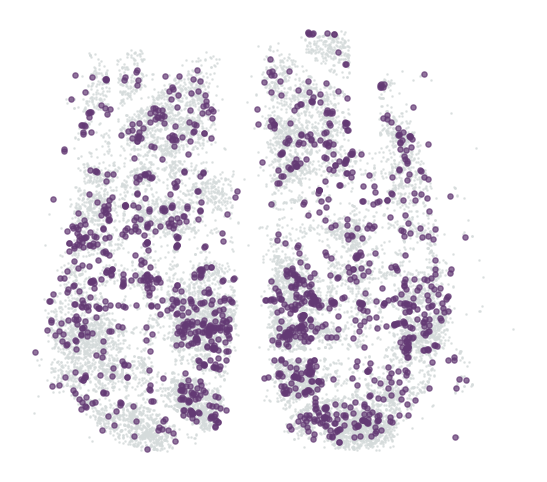

2384 select_data_ids: 826


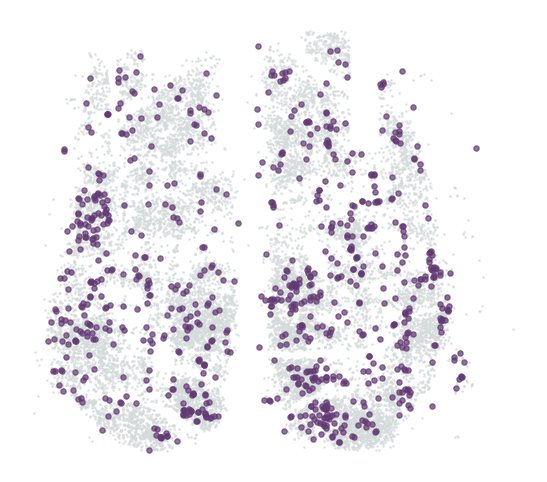

2436 select_data_ids: 1562


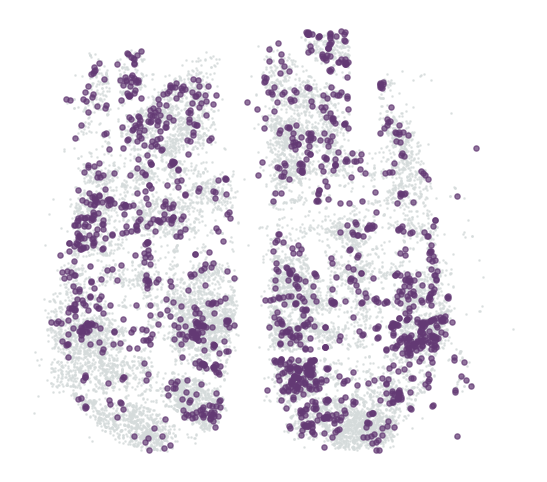

2474 select_data_ids: 1907


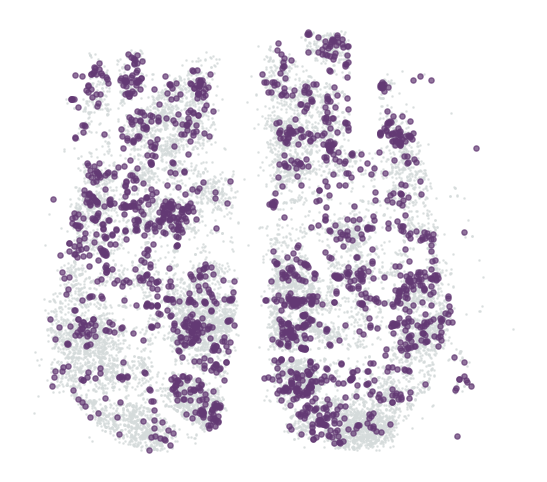

2500 select_data_ids: 692


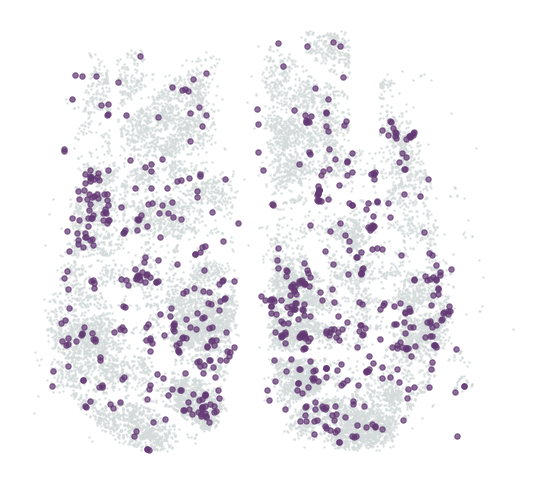

2650 select_data_ids: 696


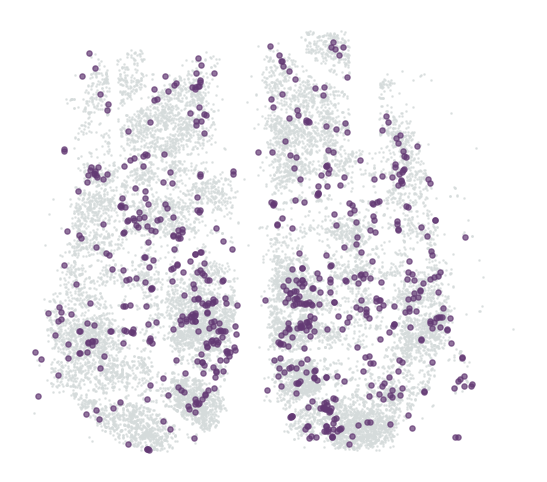

2729 select_data_ids: 790


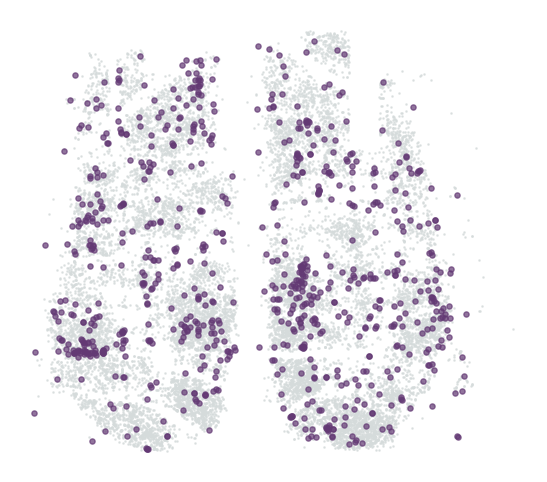

2792 select_data_ids: 675


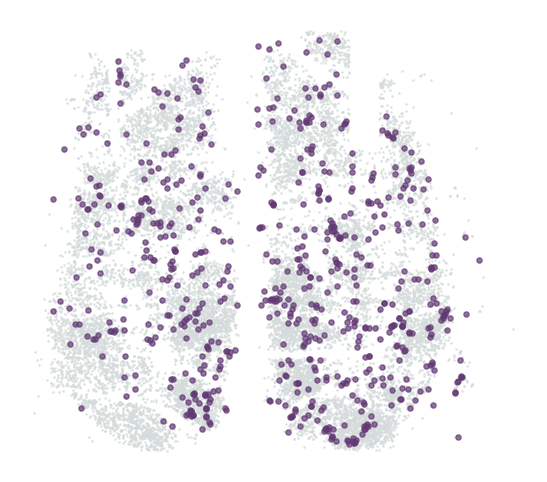

2936 select_data_ids: 529


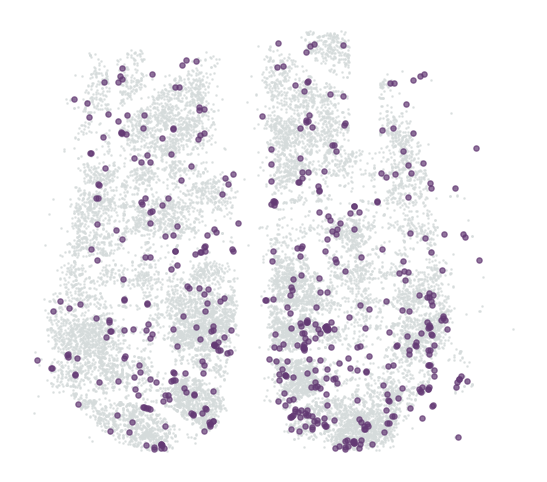

3021 select_data_ids: 588


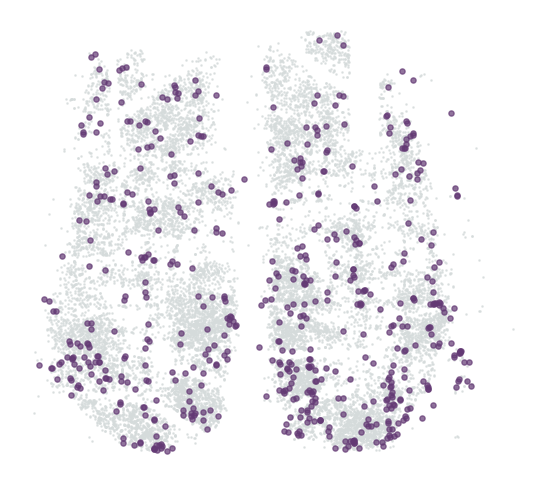

3081 select_data_ids: 635


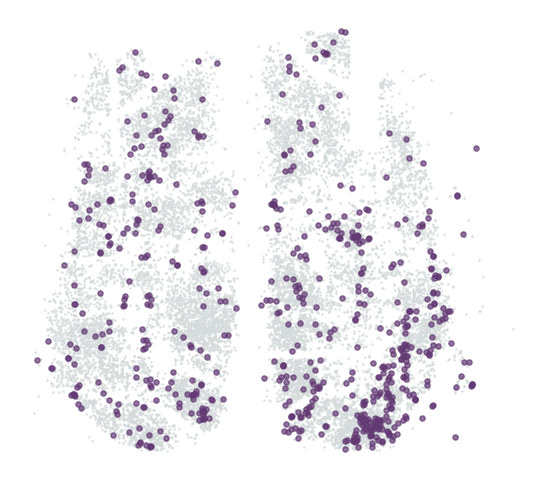

3140 select_data_ids: 294


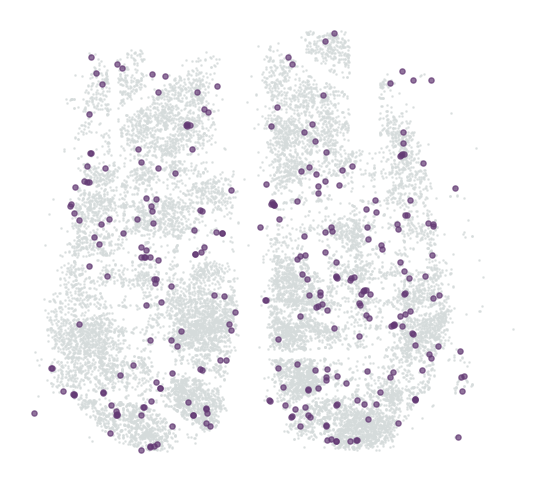

3242 select_data_ids: 391


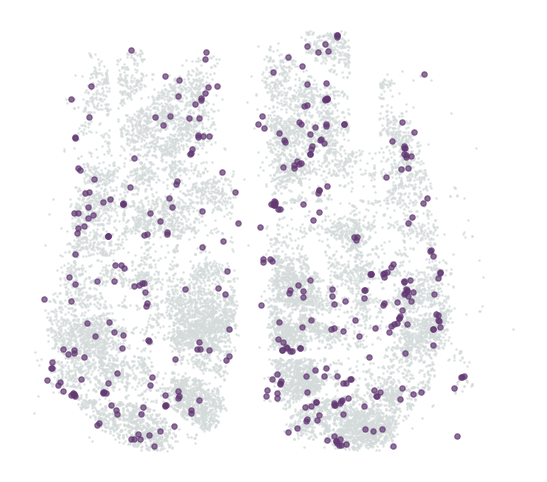

3291 select_data_ids: 210


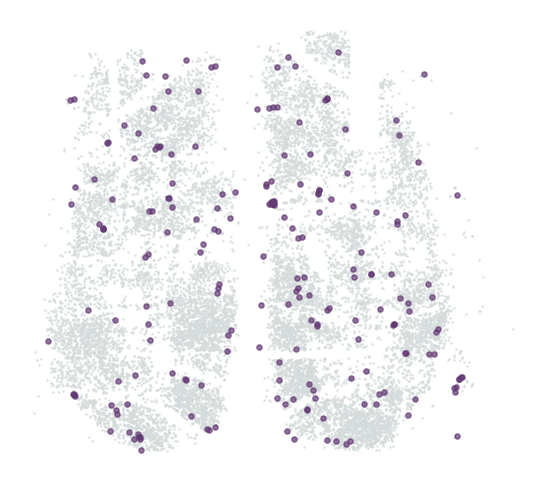

3410 select_data_ids: 178


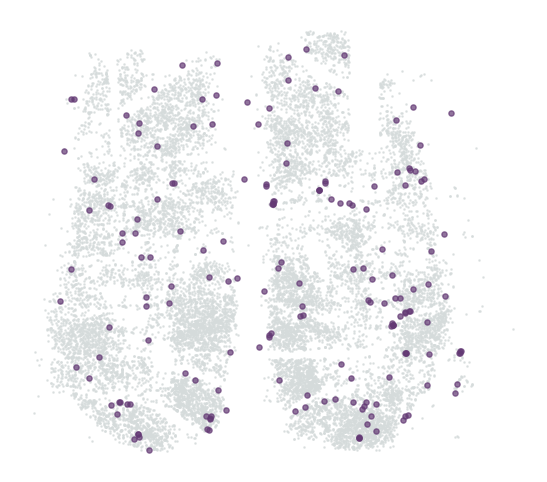

3590 select_data_ids: 273


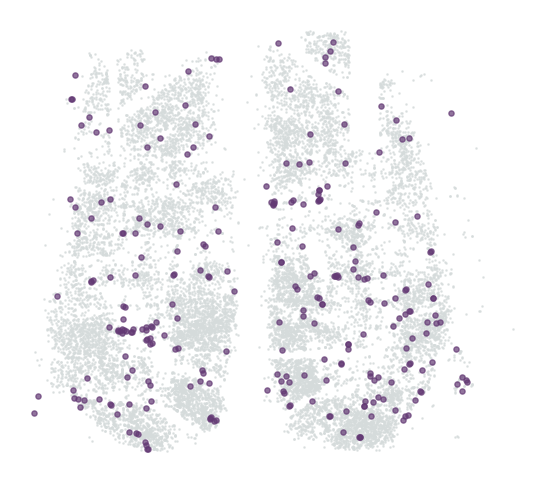

3670 select_data_ids: 213


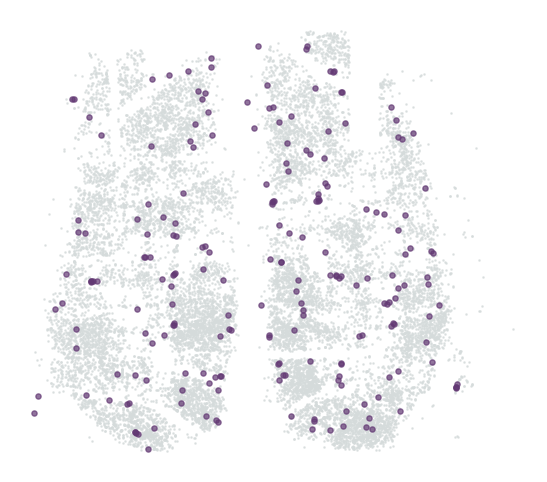

In [11]:
'''
brain map -- supp
'''

name = "ane"

# neuron map
for time_idx in range(len(ane_start_idx)):
    start, end = ane_start_idx[time_idx], ane_end_idx[time_idx]
    select_data_ids = np.load(res_path + "neurons/all_active_neurons_in_" + name + "_whole_period_" + str(time_idx) + ".npy")
    print(start, "select_data_ids:", len(select_data_ids))

    # pos
    neurons_x = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y = [valid_neuron_y[i] for i in select_data_ids]

    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x, neurons_y, s = 14, c = "#633974", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_supp_whole_period_" + str(time_idx) + ".png", bbox_inches='tight')
    plt.show()


2306 select_data_ids: 3050


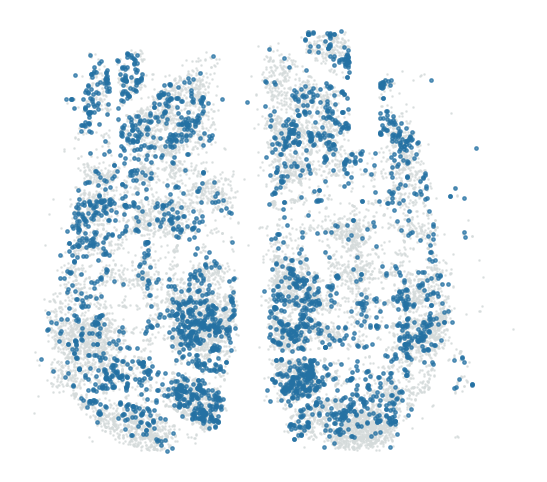

2338 select_data_ids: 2482


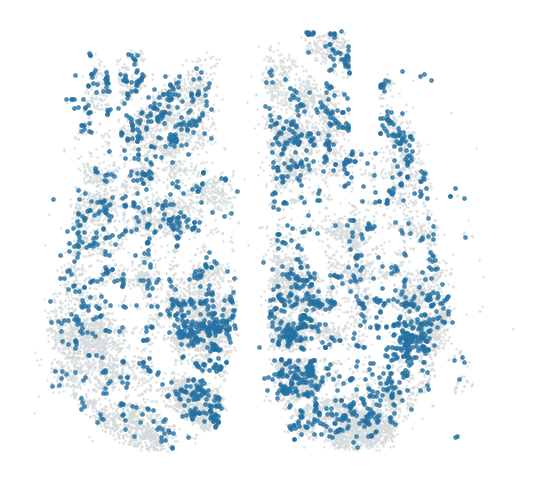

2369 select_data_ids: 2135


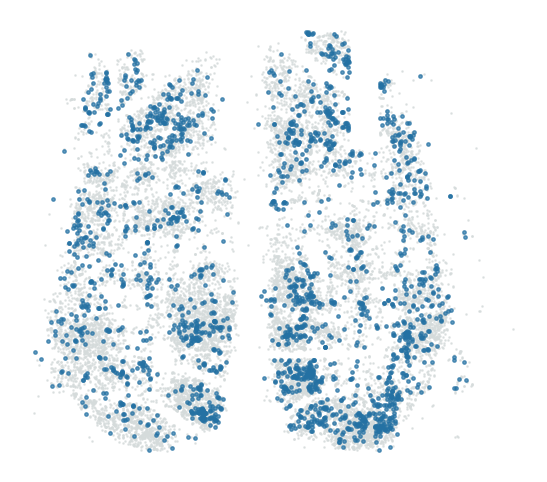

2418 select_data_ids: 3775


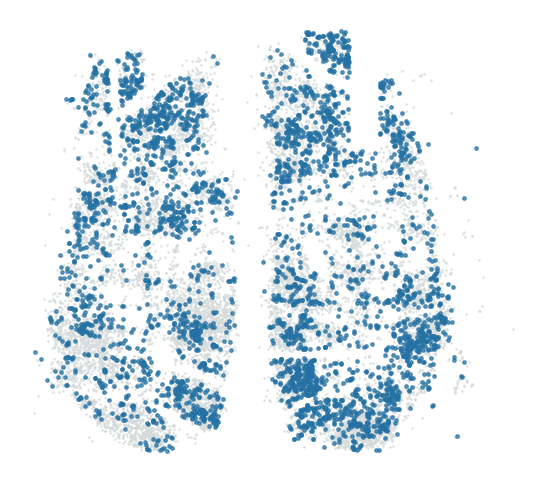

2452 select_data_ids: 4193


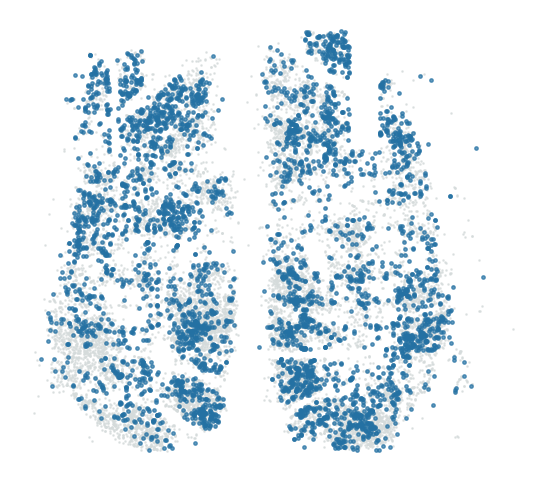

2485 select_data_ids: 3359


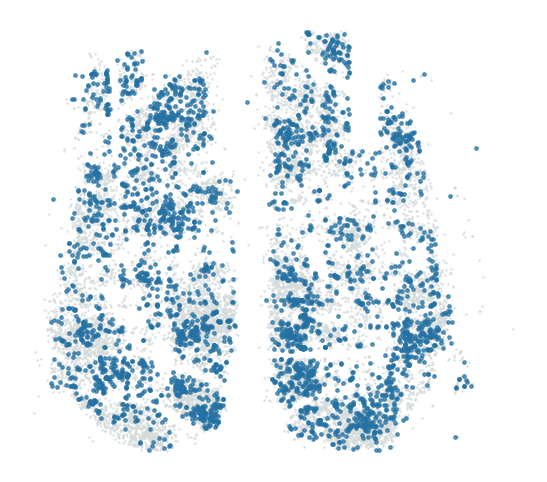

2546 select_data_ids: 4888


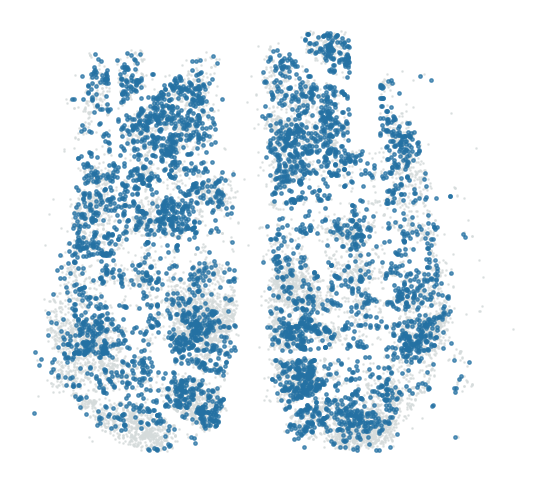

2596 select_data_ids: 4123


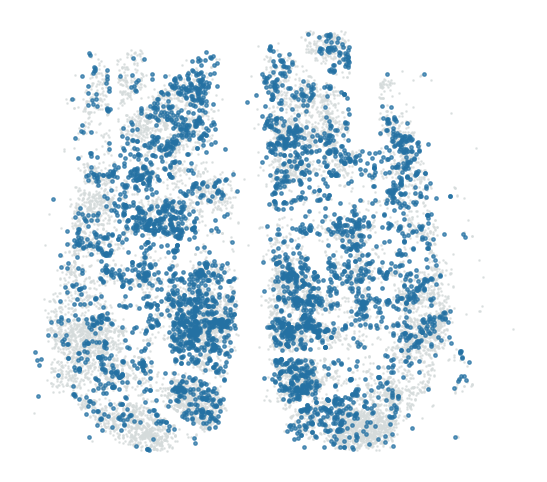

2687 select_data_ids: 3582


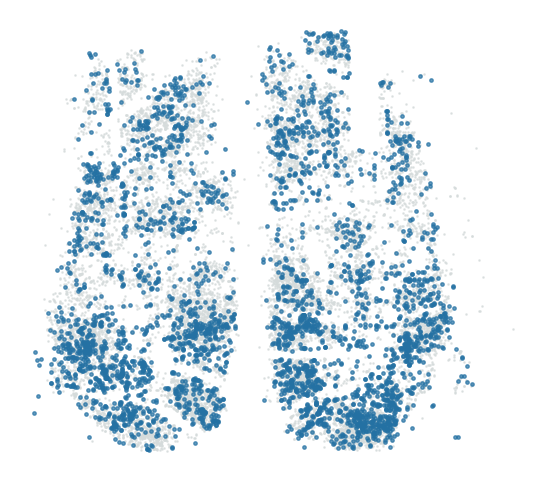

2696 select_data_ids: 3625


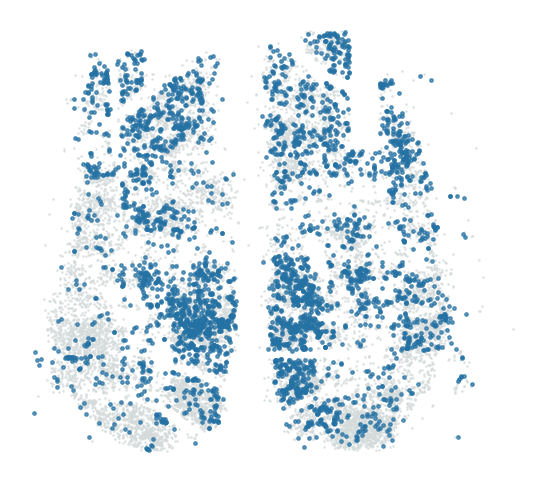

2765 select_data_ids: 3950


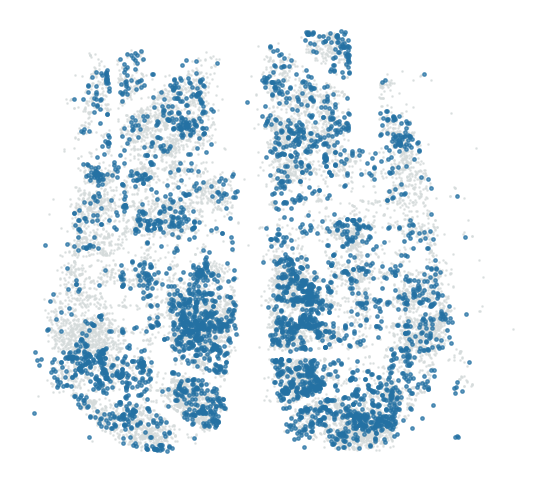

2915 select_data_ids: 6578


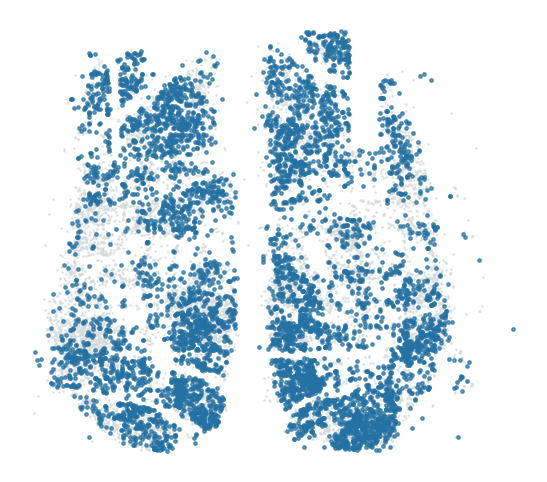

3014 select_data_ids: 1889


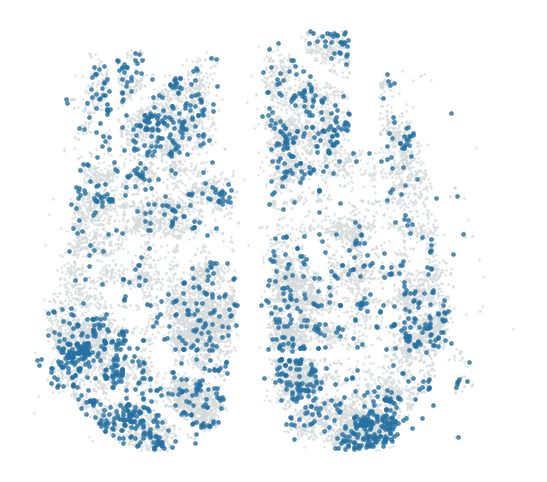

3071 select_data_ids: 2775


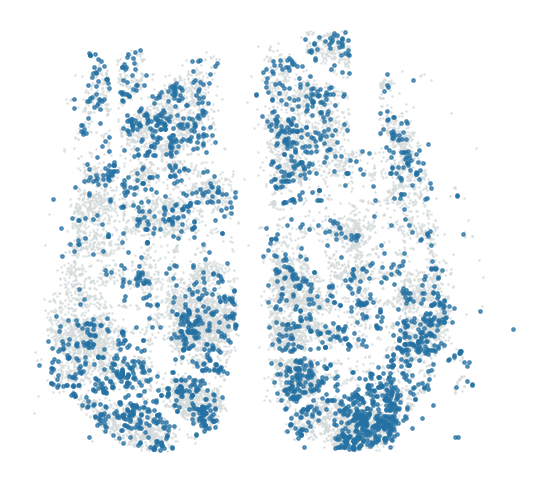

3130 select_data_ids: 2593


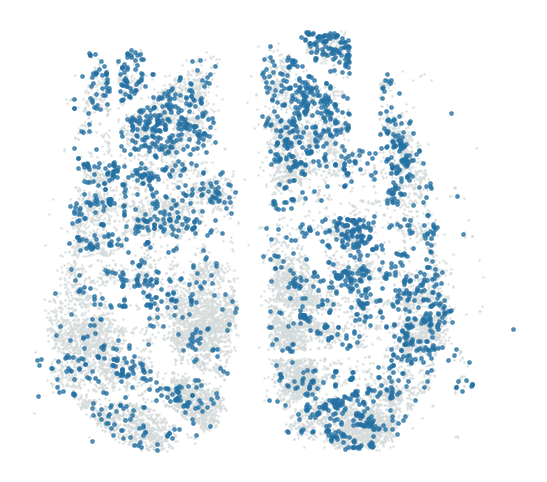

3283 select_data_ids: 1750


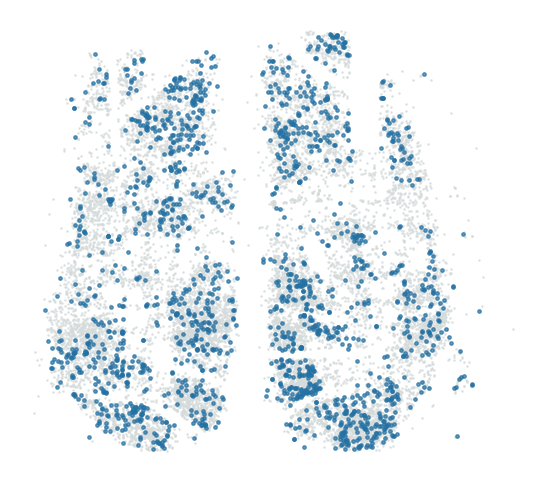

3402 select_data_ids: 797


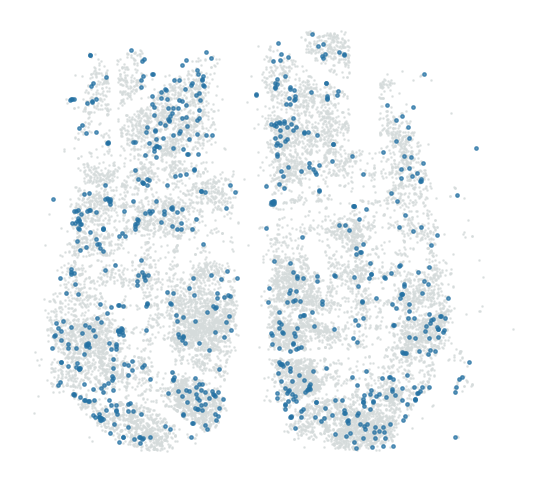

3581 select_data_ids: 1538


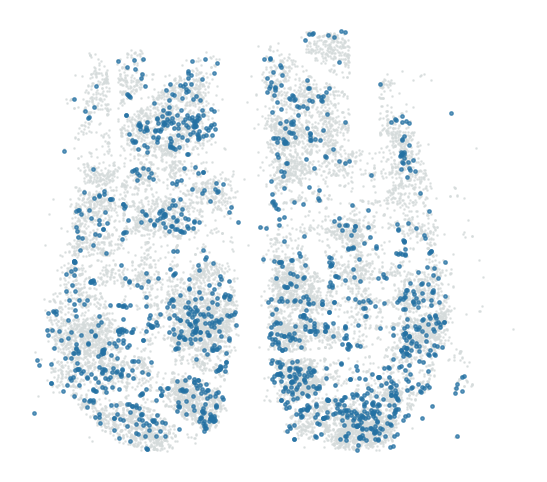

3662 select_data_ids: 803


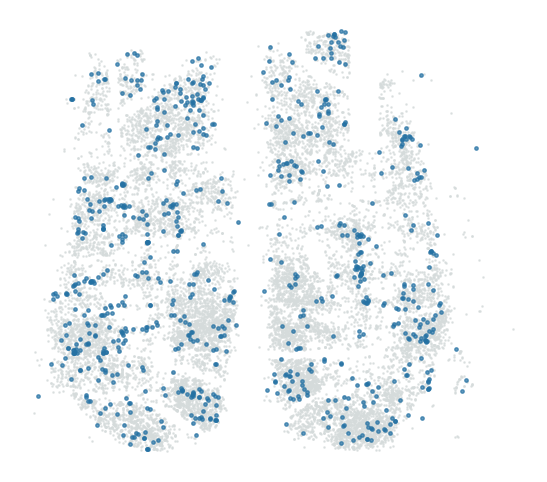

In [14]:
'''
brain map -- supp
'''

name = "bs"

# neuron map
for time_idx in range(len(bs_start_idx)):
    start, end = bs_start_idx[time_idx], bs_end_idx[time_idx]
    select_data_ids = np.load(res_path + "neurons/all_active_neurons_in_" + name + "_whole_period_" + str(time_idx) + ".npy")
    print(start, "select_data_ids:", len(select_data_ids))

    # pos
    neurons_x = [valid_neuron_x[i] for i in select_data_ids]
    neurons_y = [valid_neuron_y[i] for i in select_data_ids]

    non_select_data_ids = [i for i in range(len(denoised_data)) if i not in select_data_ids]
    non_neurons_x = [valid_neuron_x[i] for i in non_select_data_ids]
    non_neurons_y = [valid_neuron_y[i] for i in non_select_data_ids]

    fig, ax = plt.subplots(figsize = (6.8, 6), dpi= 100,facecolor="w")
    plt.scatter(non_neurons_x, non_neurons_y, s = 0.8, c = "#D5DBDB", alpha = 0.7)
    plt.scatter(neurons_x, neurons_y, s = 6, c = "#2471A3", alpha = 0.7)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(res_path + "neurons/neurons_map_burst_whole_period_" + str(time_idx) + ".png", bbox_inches='tight')
    plt.show()
